
# Project: TMDB MOVIE DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset is sourced from The Movie Database (TMDb), and contains information of over 10,000 movies, including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,
accounting for inflation over time.
> Here we will investigate this dataset to answer certain questions as;  
* Which movie genre is more popular among viewers? 
* Does the popularity of a movie affect the vote count?,
* What are the maximum and minimum duration of movies in this dataset?


#### Here, I will import all the packages i need for my analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. 

### General Properties

In [2]:
movie_df = pd.read_csv('tmdb_movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# this displays a concise summary of the dataframe, including the number of non-null values in each column.
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#this shows the sum of missing values in each column
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning 

Here, I will remove unnessary columns from my dataset to reduce bulkiness.

In [5]:
#Overview and tagline are almost same, so i will keep only overview
#homepage, keywords, production_comanies and imbd_id also need to be dropped, as they are unneccesary
#budget and revenue will be dropped for their adjusted columns

movie_df.drop(['homepage', 'tagline', 'keywords', 'production_companies', 'budget', 'revenue', 'imdb_id'], axis = 1, inplace = True)
movie_df.shape

(10866, 14)

In [6]:
#check for missing values 
movie_df.isnull().sum()

id                 0
popularity         0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [7]:
#cast, director and genres column are missing some entries
#I will drop these missing values
movie_df.dropna(inplace = True)

In [8]:
#check to see the changes
movie_df.isnull().sum()

id                0
popularity        0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [9]:
#check for duplicate values
movie_df.duplicated().sum()

1

In [10]:
#there is 1 duplicate value
movie_df[movie_df.duplicated()]

,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


In [11]:
#drop the duplicate value
movie_df.drop_duplicates(inplace=True)

In [12]:
#confirm the changes have been made
movie_df.duplicated().sum()

0

In [13]:
#Changing the release date column into standard date format

movie_df.release_date = pd.to_datetime(movie_df['release_date'])

In [14]:
#to confirm the effected change
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10729 non-null  int64         
 1   popularity      10729 non-null  float64       
 2   original_title  10729 non-null  object        
 3   cast            10729 non-null  object        
 4   director        10729 non-null  object        
 5   overview        10729 non-null  object        
 6   runtime         10729 non-null  int64         
 7   genres          10729 non-null  object        
 8   release_date    10729 non-null  datetime64[ns]
 9   vote_count      10729 non-null  int64         
 10  vote_average    10729 non-null  float64       
 11  release_year    10729 non-null  int64         
 12  budget_adj      10729 non-null  float64       
 13  revenue_adj     10729 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)


In [15]:
#to check if the dataset has values with zero
movie_df.eq(0).any().any()

True

In [16]:
# creates a boolean dataframe which is True where data is nonzero
movie_df != 0

,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,True,True,True,True,True,True,True,True,True,True,True,True,False,False
10862,True,True,True,True,True,True,True,True,True,True,True,True,False,False
10863,True,True,True,True,True,True,True,True,True,True,True,True,False,False
10864,True,True,True,True,True,True,True,True,True,True,True,True,False,False


In [17]:
#to drop rows with zero values.
movie_df = movie_df[(movie_df != 0).all(1)]

In [18]:
#checking again to confirm changes
movie_df.eq(0).any().any()

False

In [19]:
#the current number of rows and columns in the dataset
movie_df.shape

(3849, 14)

<a id='eda'></a>
## Exploratory Data Analysis

> Here, I will compute statistics and create visualizations with the aim of addressing certain research questions i have chosen in the introduction of this project. 

In [20]:
# this returns useful descriptive statistics for each column of data
movie_df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03
mean,39885.146791,1.192933,109.217459,528.387114,6.168693,2001.258249,4.429360e+07,1.372313e+08
std,67248.890597,1.475622,19.914141,880.333629,0.794697,11.285642,4.481360e+07,2.162018e+08
min,5.000000,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6072.000000,0.463337,95.000000,71.000000,5.700000,1995.000000,1.316623e+07,1.843023e+07
50%,11313.000000,0.798582,106.000000,205.000000,6.200000,2004.000000,3.005030e+07,6.181393e+07
75%,38575.000000,1.374300,119.000000,581.000000,6.700000,2010.000000,6.076720e+07,1.634115e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Plotting a scatter matrix to show correlation between columns

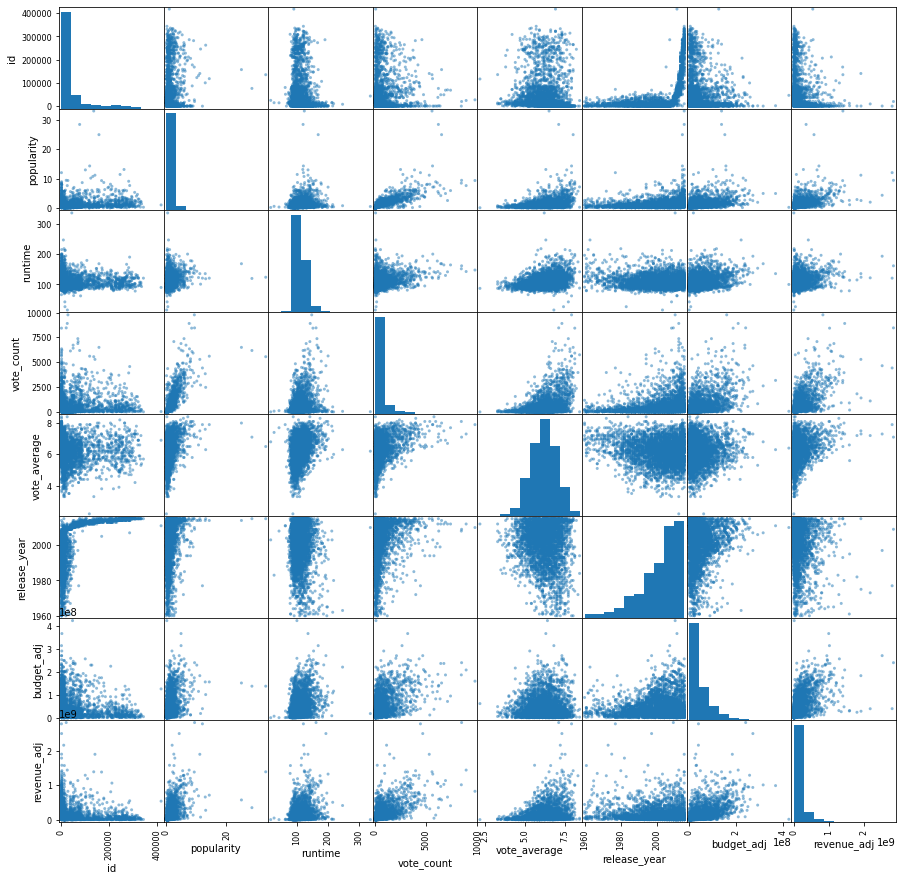

In [21]:
pd.plotting.scatter_matrix(movie_df, figsize = (15,15));

The purpose of this scatter matrix is to show if there is a correlation or relationship between the various colunms in the dataset. 

The matrix above shows that there is no correlation between other columns and the id column, which is valid as the id is the numeric identifer assigned to various movies and does not affect other values positively or negatively, same as release year.


There is a positive correlation between popularity and vote count of movies, a more popular movie is most likely to get a high vote count. There is also a positive correlation betwwen budget adjusted and revenue adjusted, also between revenue adjusted and vote count.

## Question 1
### Which movie genre is more popular among viewers?

What kind of movies captures the interest of movie viewers? Knowing the answer to this will help in movie budgeting and also movie recommendation systems to make better recommendations to viewers.

To answer this question, I use a function to group movies with similar genre together to allow for better analysis.

In [22]:
num_genres = movie_df.groupby('genres').count()
print(num_genres)

                                                   id  popularity  \
genres                                                              
Action                                             21          21   
Action|Adventure                                    6           6   
Action|Adventure|Animation|Family|Fantasy           1           1   
Action|Adventure|Animation|Family|Science Fiction   1           1   
Action|Adventure|Animation|Science Fiction          1           1   
...                                                ..         ...   
Western|Drama                                       2           2   
Western|Drama|Adventure|Thriller                    1           1   
Western|History                                     1           1   
Western|History|War                                 1           1   
Western|Thriller                                    1           1   

                                                   original_title  cast  \
genres                     

As shown from the data, a movie can belong to multiple genres, hence the groupby function will not work here.

I will need to split the values in the genre column, create a new column with the split values before i can group them together and analyse them.

In [23]:
#splitting all the data and concatenating them into a single file
genre_list = movie_df['genres'].str.cat(sep = '|')
genre_list

'Action|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Thriller|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Fantasy|Action|Crime|Thriller|Western|Drama|Adventure|Thriller|Science Fiction|Action|Thriller|Adventure|Drama|Adventure|Science Fiction|Family|Animation|Adventure|Comedy|Comedy|Animation|Family|Action|Adventure|Crime|Science Fiction|Fantasy|Action|Adventure|Drama|Science Fiction|Action|Comedy|Science Fiction|Action|Adventure|Science Fiction|Crime|Drama|Mystery|Western|Crime|Action|Thriller|Science Fiction|Action|Adventure|Romance|Fantasy|Family|Drama|War|Adventure|Science Fiction|Action|Family|Science Fiction|Adventure|Mystery|Action|Drama|Action|Drama|Thriller|Drama|Romance|Comedy|Drama|Action|Comedy|Crime|Comedy|Action|Adventure|Drama|Thriller|History|Action|Science Fiction|Thriller|Crime|Action|Science Fiction|Comedy|Music|Thriller|Drama|Adventure|Horror|Comedy|Drama|Thriller|Adventure|Animation|Comedy|Family|Fantasy|Action|Crime|D

In [24]:
#to create a single column for our split data using panda series
genre = pd.Series(genre_list.split('|')).str.strip()
genre

0                 Action
1              Adventure
2        Science Fiction
3               Thriller
4                 Action
              ...       
10285              Drama
10286                War
10287            Romance
10288          Adventure
10289    Science Fiction
Length: 10290, dtype: object

I have now created a new column with 10290 rows. 

To make this more organized and easier to visualize, i will be counting the number of occurances of each movie genre.

In [25]:
#lets count the occurances of each listed genre
genre_counts = genre.value_counts(ascending=True)
genre_counts

TV Movie              1
Foreign              12
Documentary          31
Western              52
War                 119
History             129
Music               134
Animation           201
Mystery             344
Fantasy             396
Family              425
Horror              463
Science Fiction     519
Crime               651
Romance             666
Adventure           749
Action             1085
Thriller           1203
Comedy             1357
Drama              1753
dtype: int64

Now we have the count of the different movie genres listed in ascending order, with Tv Movie having the least count of 1, and Drama genre having the highest count of 1753.

Lastly, to visualize this information, i will be using a bar chart.

In [33]:
#I will create a function to make plotting faster
def plot_variables(Xlabel, Ylabel, Title):
    plt.xlabel(Xlabel, fontsize=12)
    plt.ylabel(Ylabel, fontsize=12)
    plt.title(Title, fontsize=16)
    return plt.show()

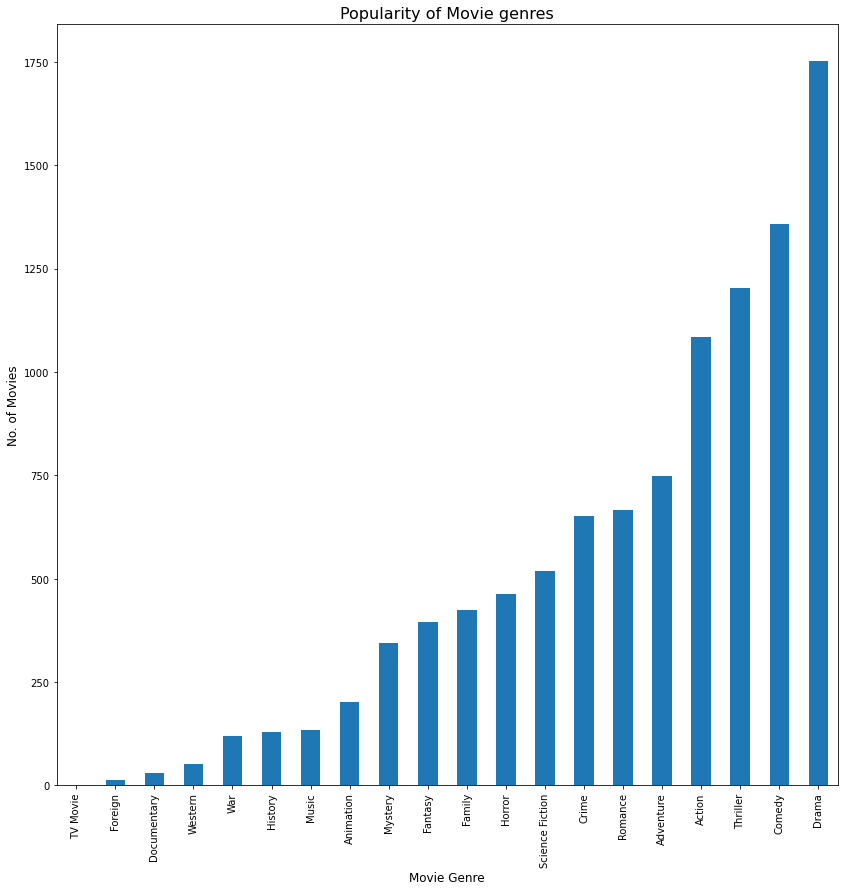

In [34]:
genre_counts.plot(kind='bar', figsize=(14,14))
plot_variables('Movie Genre', 'No. of Movies', 'Popularity of Movie genres')

From the above bar chart, it shows that the Drama genre is the most popular movie genre amongst movie viewers, followed by Comedy and Thriller genres.

## Question 2
### Does the popularity of a movie affect the vote count?

The aim of this question is to find out if the popularity of a movie influences movie viewers to give that movie a high vote.

Using a scatter plot, I will check for a correlation between movie popularity and the vote count.


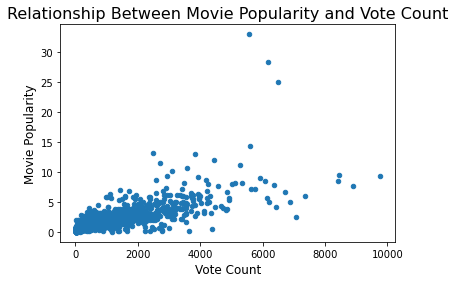

In [31]:
#plotting a scatter plot of movie popularity against movie vote count
movie_df.plot(x='vote_count', y= 'popularity', kind = 'scatter')
plot_variables('Vote Count', 'Movie Popularity', 'Relationship Between Movie Popularity and Vote Count')

From the scatter plot above, it shows there is a positive correlation between popularity and vote count. I can deduce from this, that the more popular a movie is the higher the votes it gets from movie viewers.

## Question 3
### What are the maximum and minimum duration of movies?

Firstly, I will use a histogram to display the runtime of all the movies in the dataset, then using object methods, i will find out the maximum and minimum movie duration in the dataset.

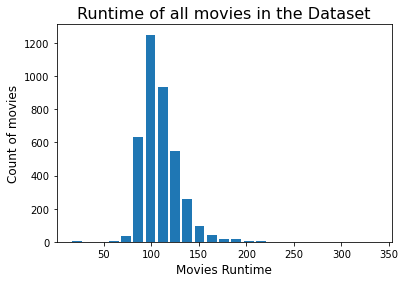

In [32]:
#plotting a histogram
movie_df['runtime'].plot(kind='hist',rwidth = 0.8, bins =25);
plot_variables('Movies Runtime', 'Count of movies', 'Runtime of all movies in the Dataset')




To get the maximum movie duration

In [ ]:
max_runtime = movie_df['runtime'].max()

print(f'The maximum runtime of movies is {max_runtime} minutes')

To get the minimum movie duration

In [ ]:
min_runtime = movie_df['runtime'].min()
print(f'The minimum runtime of movies is {min_runtime} minutes')

<a id='conclusions'></a>
## Conclusions

This statistics show us that the average budget is (4.429360e+07) dollars and the average revenue is (1.372313e+08) dollars.

The movies in this dataset were released between 1960 and 2015.

There is a positive relationship/correlation between movie popularity and the vote count.

The most Popular movie genres are First: Drama, Second: Comedy, and Third: Thriller.

The average movie duration is (109 min). The minimum duration is 15 min and the maximum is 338 min.


<a id='conclusions'></a>
## Limitations
My analysis is limited to only the dataset provided.
Dropping missing values from variables of interest might skew the analysis and could show unintentional bias towards the relationship being analyzed. 

<a id='conclusions'></a>
## References
[Kaggle TMDb dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata)


[Python documentation](https://docs.python.org/3/)

[Stack Overflow](https://stackoverflow.com)
